<a href="https://colab.research.google.com/github/DANU011/practice-analysis/blob/main/bigdata/bigdata_chap6_SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 단순 선형 회귀(Simple Linear Regression Model)
### 1. 정규방정식
#### (1) scikit-learn의 LinearRegression
최소 자승법을 사용한 OLS(Ordinary Least Squares) 방식으로 선형 회귀 모들을 구현한다. 즉, 계수 w = (w1, ..., wp)를 사용해 선형 모델을 피팅하여 데이터세트에서 관찰된 대상과 션형 근사에 의해 예측된 대성 간의 잔차제곱합을 최소화한다.  


① 매개변수  
 - fit_intercept (defult = True) : 절편 계산할지 여부 결정.
 - normalize (defult = False) : True인 경우 예측 변수가 회귀하기 전에 평균을 빼고 L2-norm으로 나눠서 회귀 전에 정규화됨. 표준화를 진행하고 싶으면, False로 설정한 뒤 fit()을 호출하기 전에 StandardScater() 사용.
 - copy_X (defult = True) : True인 경우 입력 데이터(예측 변수)가 복사. False인 경우 덮어씀.  
 - n_jobs (defult = None) : 계산에 사용할 작업 수. -1로 설정하면 모든 사용 가능한 CPU가 사용됨.
 - positive (defult = False) : True로 하면 계수가 양수가 됨.  


② 속성  
 - coef_ (n_features,) 또는 (n_targets, n_features)의 array 형태 : 선형 회귀 문제에 대한 추정된 계수. 대상이 두 개 이상이면 2차원 배열(n_largest, n_features)이고, 대상이 하나면 길이가 n_features인 1차원 배열.
 - rank_ int : 행렬 X의 rank.
 - singular (min(X, y),)의 array 형태 : 행렬 X의 특이값.
 - intercept_ float 또는 (n_targets,)의 array 형태 : 선형 모델의 독립항(절편). False인 경우 0.0으로 설정.


③ 메서드  [] 안의 인자는 생략 가능.  
 - fit(X, y[, sample_weight]) :   
   - 모델을 학습시킴.
   - 매개변수 :
     - X : 학습데이터, 2차원 array 형태로 입력.
     - y : 훈련데이터, (n_features,) 또는 (n_targets, n_features)의 array 형태로 입력.
     - sample_weight : 개별데이터에 대한 가중치.
   - 반환값 : 선형 회기 모델 추정기를 Object로 반환.
 - get_params([deep]) :  
   - 선형 회귀 모델의 매개변수를 가져옴.
   - 매개변수 :
     - deep : bool 형태로 입력. default = True.
   - 반환값 : 값에 매칭되는 파라미터의 이름을 딕셔너리 형태로 반환.
 - predict(X):
   - 선형 모델을 사용해 예측.
   - 매개변수 :
     - X : 데이터 샘플
   - 반환값 : 예측값을 array로 반환.
 - score(X, y[, sample_weight]):
   - 예측의 결정계수를 반환.
   - 매개변수 :
     - X : 테스트 샘플을 array로 입력.
     - y : X의 실제 값,
     - sample_weight : 개별 데이터에 대한 가중치.
   - 반환값 : 결정계수를 float으로 반환.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 캐글의 보험 가입자 데이터를 사용한 선형 회귀 모델 구현
url = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv'
data = pd.read_csv(url)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


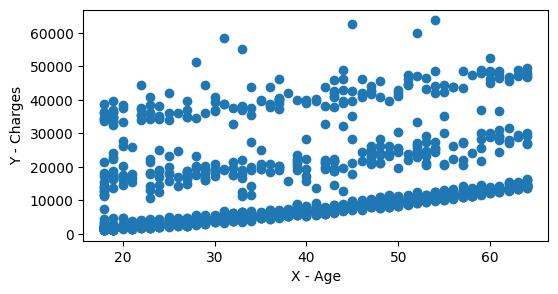

In [21]:
# age와 charges 사이의 선형성 확인
x = data['age']
y = data['charges']

plt.figure(figsize = (6, 3))
plt.scatter(x, y)
plt.xlabel('X - Age')
plt.ylabel('Y - Charges')
plt.show()

In [10]:
# age와 charges 사이에 선형성 발견. 우상향하는 추세.

# age와 charges 사이의 선형 모델 생성

# shape 맞추기
x = np.array(data['age'])
y = np.array(data['charges'])

x = x.reshape(1338, 1)# .fit() 입력 데이터는 2차원, 차원 맞추기 (rows, 1)
y = y.reshape(1338, 1)

# 학습
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [13]:
# 결과
print('====== LinearRegression Result ======')
print('절편 : ', lr.intercept_, '계수 : ', lr.coef_)

====== LinearRegression Result ======
절편 :  [3165.88500606] 계수 :  [[257.72261867]]


In [14]:
# 결정계수
print(lr.score(x, y))

0.08940589967885804


In [16]:
# 결정계수가 9%로 낮음. 잘 적합되지 못함.

# 새로운 데이터 샘플을 선형 회귀 모델에 입렵
x_new = [[19],[64]]
y_hat = lr.predict(x_new)
print(y_hat) # 모델이 예측한 값은 y hat(ŷ)으로 표현

[[ 8062.61476073]
 [19660.13260074]]


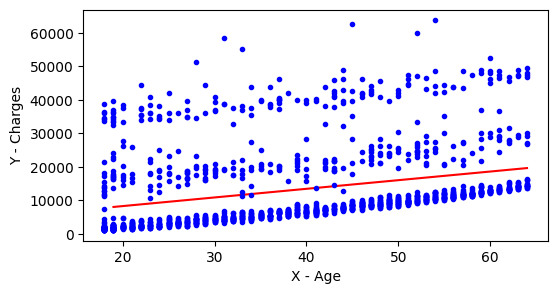

In [22]:
# 선형 모델이 데이터를 얼마나 설명할 수 있는지 확인
plt.figure(figsize = (6, 3))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X - Age')
plt.ylabel('Y - Charges')
plt.show()

In [23]:
# 빨간색 선 그래프는 모델의 예측값
# 파란색 점 그래프는 실제 데이터
# 모델의 예측이 실제 데이터와 얼마나 일치하는지 시각적으로 확인할 수 있음.

### 2. 경사하강법
(1) 함수의 값이 낮아지는 방향으로 독립변수의 값을 바꿔가면서 최종적으로 최소 함숫값을 갖도록 하는 독립 변숫값을 찾는 방식. 경사하강법을 사용하는 이유는 분석에서 마주하는 함수들은 형태가 복잡해 수식으로 미분계수와 그 해를 찾기 어려울 수 있다. 또한 데이터의 양이 큰 경우 경사하강법이 상대적으로 쉽게 컴퓨터로 구현될 수 있다. 무작위초기화방식을 통해 임의의 값으로 시작해 한 번에 조금씩 함수의 값이 감소하는 방향으로 최솟값에 수렴할 때까지 점진적으로 진행한다. 이때 학습 스텝의 크기인 학습률을 조절할 수 있는데 학습률이 너무 작으면 시간이 너무 오래 걸리고 학습률이 너무 높으면 발산되는 경향이 있기 때문에 하이퍼파라미터인 학습률을 적정한 크기로 조절해야 한다.


(2) 경사하강법의 종류  

① 배치 경사하강법  
   - ⓐ 반복 시 전체 훈련세트를 사용해 가중값을 갱신한다.  
   - ⓑ 계산량이 많아 훈련에 소요되는 시간이 증가한다. 하지만 학습 시 발생하는 잡음이 적은 최적치를 찾을 수 있다.

② 확률적 경사하강법
   - ⓐ 한 개의 샘플데이터를 무작위로 선택하고 그 샘플에 대한 경사를 계산한다. 매 반복마다 가중값이 달라지기 때문에 비용 함수가 최솟값에 접근할 때 확률값으로 요동치며 평균적으로 감소한다.
   - ⓑ 최솟값에 요동치면서 접근하기 때문에 알고리즘이 멈출 때 최적치가 아닐 수 있다. 하지만 지역 최솟값을 건너뛰고 전역 최솟값으로 다다를 가능성이 높고 데이터의 양이 많아도 계산 속도가 빠르다.

③ 미니 배치 경사하강법
   - ⓐ 각 스텝을 반복할 때 임의의 30~50개 관측값으로 경사를 계산하고 모델의 가중값을 갱신한다.
   - ⓑ 파라미터공간에 확률적 경사하강법보다 지역 최솟값에서 빠져나오기 어려울 가능성이 있다. 하지만 확률적 경사하강법보다 낮은 오차율을 가지게 되어 최솟값에 더 가까이 도달할 수 있다.


(3) scikit-learn의 SGDRegressor
확률적 경사하강법을 사용해서 회귀 모델을 구현한다. 손실의 기울기는 각 샘플에서 한번에 추정되며 모델은 감소하는 강도인 학습률에 따라 업데이트된다. 정규화는 제곱 유클리드 norm L2 또는 norm L1 또는 이 둘의 조합(elastic net)을 이용해 매개변수를 0벡터로 축소하는 손실 함수에 추가된 패너티이다.


① 매개변수
 - loss str(default = 'squared_error') : 사용할 손실 함수를 설정하는 매개변수. 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'를 사용할 수 있음.  
 - penalty str(default = '12') :
 사용할 패널티(정규화, Normalization)를 설정.
 'ㅣ1', 'ㅣ2', 또는 'elasticnet'을 사용할 수 있다. 선형 SVM 모델의 표준 정규화 장치인 'ㅣ2'가 기본값이다.  
 - alpha float(default = 0.0001) :
 정규화 항을 곱하는 상수이다. 값이 높을수록 정규화가 강해진다.  
 - ㅣ1_ratio float(default = 0.15) :
 0 = l1_ratio은 L2 패널티에 상응하며 1 - ㅣ1_ratio는 L1 패널티에 상응한다. ㅣ1_ratio가 0 이상 1 이하일 경우 elaticnet에 적용된다.  
 - fit_intercept bool(default = True) : 절편을 추정해야 하는지 여부이다. False이면 데이터가 이미 중앙에 있는 것으로 간주한다.  
 - max_iter int(default = 1000) : 훈련 데이터(또는 epoch)에 대한 최대 패스 수이다.  
 - tol float(default = 1e-3) : 중지 기준이다. [n_iter_no_charge]의 연속적인 에포크 동안 (loss > best_loss - tol)일 때 학습을 멈춘다. [early_stopping] 파라미터에 따라 traing loss 또는 validation loss에 대해 수렴 여부를 확인한다.  
 - shuffle bool(default = 0) : 자세하 정보 수준을 나타낸다.  
 - verbose int(default = 0) : 자세한 정보 수준을 나타냄.
 - epsilon float(default = 0.1) : loss가  'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'인 겨우 엡실론 값을 나타낸다. 'huber'의 경우 예측을 정확히 맞추는 것이 덜 중요해지느 임곗값을 결정한다. 'epsilon_insensitive'인 경우 현재 예측과 올바른 레이블 간의 차이가 이 임곗값보다 작으면 무시한다.  
 - random_state int(default = None) : shuffle이 True로 설정된 경우 데이터 셔플에 사용한다. 여러 함수 호출에서 재현 가능한 int를 전달.  
 - learning_rate str(default = 'invscaling') : 학습률의 스케줄을 설정한다.  
 'constant' : eta = eta0  
 'optimal' : eta = 1.0 / (alpha * (t + t0))  
 'invscaling' : eta = eta0 / pow(t, power_t)
 - eta0 float(default = 0.01) : 학습률의 초깃값을 설정한다.  
 - power_t float(default = 0.25) : invscaling 학습률의 지수.
 - early_stopping bool(default = False) : Validation Score가 개선되지 않았을 때 학습을 멈출 것인지 여부에 대해 설정하는 것이다. True로 설정한 경우, 자동으로 훈련데이터의 일부를 검증으로 따로 설정하고 메서드에서 반환된 Validation Score가 연속적인 에포크 이상 동안 개선되지 않을 때 훈련을 종료한다.  
 - validation_fraction float(default = 0.1) : ealry stopping을 위해 학습데이터세트에서 일정부분 validation set로 떼어두는 비율. 0~1사이의 값만 입력할 수 있다. [early_stopping]이 True로 설정되었을 때만 사용 가능하다.  
 - n_iter_no_charge int(default = 5) : 학습을 중지하기 전에 개선사항이 없는 학습을 반복하는 횟수.
 - warm_start bool(default = False) : True로 설저하면 초기화에 맞게 이전 호출의 솔루션을 재사용하고, 그렇지 않으면 이전 솔루션을 지움.  
 - average bool 또는 int(default = False) : True로 설정하면 모든 업데이트에서 평균 SGD 가중치를 계산하고 그 견과를 coef_ 속성에 저장한다. 만약 1보다 큰 저수를 설정할 경우, 표시된 샘플의 총 수가 average에 도달하면 평균화가 시작된다.  

② 속성  
 - coef_ (n_features,) 또는 (n_targets, n_features)의 array 형태 : 선형 회귀 문제에 대한 추정된 계수. 대상이 두 개 이상이면 2차원 배열(n_largest, n_features)이고, 대상이 하나면 길이가 n_features인 1차원 배열.
 - rank_ int : 행렬 X의 rank.
 - singular (min(X, y),)의 array 형태 : 행렬 X의 특이값.
 - intercept_ float 또는 (n_targets,)의 array 형태 : 선형 모델의 독립항(절편).


③ 메서드  [] 안의 인자는 생략 가능.  
 - fit(X, y[, sample_weight]) :   
   - 모델을 학습시킴.
   - 매개변수 :
     - X : 학습데이터, 2차원 array 형태로 입력.
     - y : 훈련데이터, (n_features,) 또는 (n_targets, n_features)의 array 형태로 입력.
     - sample_weight : 개별데이터에 대한 가중치.
   - 반환값 : 선형 회기 모델 추정기를 Object로 반환.
 - get_params([deep]) :  
   - 선형 회귀 모델의 매개변수를 가져옴.
   - 매개변수 :
     - deep : bool 형태로 입력. default = True.
   - 반환값 : 값에 매칭되는 파라미터의 이름을 딕셔너리 형태로 반환.
 - partial_fit(X, y) :  
   - 주어진 샘플에 대해 한 epoch의 확률적 경사하강법을 수행.
   - 매개변수  :  
     - X : 후년 데이터의 하위 집합.  
     - y : 대상 값의 하위 집합.  
   - 반환값 : self의 인스턴스를 반환.  
 - predict(X) :
   - 선형 모델을 사용해 예측.
   - 매개변수 :
     - X : 데이터 샘플
   - 반환값 : 예측값을 array로 반환.
 - score(X, y[, sample_weight]):
   - 예측의 결정계수를 반환.
   - 매개변수 :
     - X : 테스트 샘플을 array로 입력.
     - y : X의 실제 값,
     - sample_weight : 개별 데이터에 대한 가중치.
   - 반환값 : 결정계수를 float으로 반환.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# 캐글의 보험 가입자 데이터를 사용한 선형 회귀 모델 구현
url = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv'
data = pd.read_csv(url)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
# shape 및 차원 맞추기
x = np.array(data['age'])
x = x.reshape(1338, 1)
y = np.array(data['charges'])
y = y.reshape(1338, 1)

sgd_reg = SGDRegressor(max_iter = 1000, random_state = 45)
sgd_reg.fit(x, y.ravel())

SGDRegressor(random_state=45)

In [13]:
# 결과
print('===== SGD 회귀 모델 결과 =====')
print('절편 : ', sgd_reg.intercept_, '계수 : ', sgd_reg.coef_)
print(sgd_reg.get_params())

===== SGD 회귀 모델 결과 =====
절편 :  [-399.62640563] 계수 :  [727.51535272]
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': 45, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [14]:
# 새로운 데이터 샘플 입력
x_new = [[19], [64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[13423.16529614 46161.35616875]


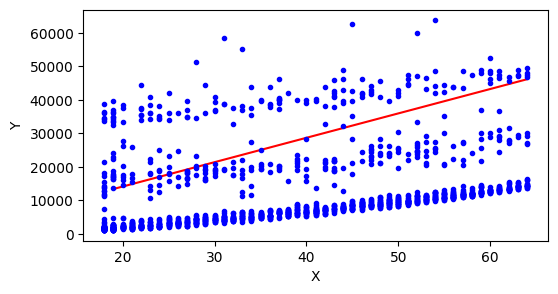

In [15]:
# 시각화
plt.figure(figsize = (6, 3))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b. ')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()